In [777]:
import pandas as pd
import openpyxl 
from datetime import datetime 
from scipy.stats import kurtosis
import numpy as np 
import pylab as p
import os
from pathlib import Path
from openpyxl import load_workbook

In [778]:
#get the sorted fin file
file_name_str = r"..\Sray\fin concate esg\AU_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\CN_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\HK_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\MY_bloom_fin_esg.xlsx";
# file_name_str = r"..\Sray\fin concate esg\SG_bloom_fin_esg.xlsx";
file_name = Path(file_name_str).stem
fin_file = pd.ExcelFile(file_name_str)

findata_sheet = pd.read_excel(fin_file, sheet_name="fin_esg", index_col=0, header=0)

fin_data = pd.DataFrame(findata_sheet)

fin_data.head() 


,Year,Dates,Tkr & Exch,Name,Sec_no,PX_LAST,MARKET_RETURN,HISTORICAL_MARKET_CAP,TRAIL_12M_SALES_PER_SH,IS_EPS,...,PE_RATIO,RETURN_COM_EQY,RETURN_ON_ASSET,VOLATILITY_180D,VOLATILITY_360D,BETA_RAW_OVERRIDABLE,esg,g,s,e
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,14.21,NaN,2106.1474,5.4231,0.650,...,11.8356,9.1476,6.6192,19.025,19.277,1.4001,25.570868,63.576160,11.396614,1.600725
1,2018,2018-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.38,0.293455,2446.5306,5.5502,0.766,...,11.9589,9.3071,6.6675,22.331,20.029,0.9532,27.462027,63.576160,12.031439,6.644518
1,2019,2019-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,13.21,-0.281284,2966.1299,6.1702,0.388,...,17.3853,4.5509,3.1119,33.956,27.923,1.1518,34.825470,69.837448,23.579203,10.933253
1,2020,2020-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.68,0.414080,2804.7458,6.1899,0.473,...,8.7052,13.6242,8.8623,25.609,32.048,1.0724,36.636154,69.837448,23.579203,16.369677
1,2021,2021-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,22.55,0.207173,3407.2724,6.3081,3.830,...,4.5413,27.9240,17.3265,25.531,25.115,1.1057,47.289005,83.052376,31.620314,27.061312


In [779]:
print (fin_data.columns)

Index(['Year', 'Dates', 'Tkr & Exch', 'Name', 'Sec_no', 'PX_LAST',
       'MARKET_RETURN', 'HISTORICAL_MARKET_CAP', 'TRAIL_12M_SALES_PER_SH',
       'IS_EPS', 'CF_FREE_CASH_FLOW', 'PE_RATIO', 'RETURN_COM_EQY',
       'RETURN_ON_ASSET', 'VOLATILITY_180D', 'VOLATILITY_360D',
       'BETA_RAW_OVERRIDABLE', 'esg', 'g', 's', 'e'],
      dtype='object')


In [780]:
fin_data ['es'] = fin_data['e'] * fin_data['s']
fin_data ['eg'] = fin_data['e'] * fin_data['g']
fin_data ['sg'] = fin_data['s'] * fin_data['g']
fin_data['esg_cubic'] = fin_data['esg']**3

In [781]:
fin_data = fin_data.rename({'Name': 'firm_name',
                            'Tkr & Exch': 'tkr',
                            'Sec_no': 'sec_no',
                            'Dates': 'date',
                            'Year':'Year'.lower(),
                            'PE_RATIO': 'pe',
                            'BETA_RAW_OVERRIDABLE': 'beta',
                            'CF_FREE_CASH_FLOW': 'fcf',
                            'RETURN_ON_ASSET': 'roa',
                            'PX_LAST': 'px', 
                            'MARKET_RETURN': 'ret', 
                            'HISTORICAL_MARKET_CAP': 'HISTORICAL_MARKET_CAP'.lower(), 
                            'TRAIL_12M_SALES_PER_SH': 'TRAIL_12M_SALES_PER_SH'.lower(), 
                            'IS_EPS': 'IS_EPS'.lower(),
                            'RETURN_COM_EQY': 'RETURN_COM_EQY'.lower(),
                            'VOLATILITY_180D':'vol_180d',
                            'VOLATILITY_360D':'vol_360d'}, axis=1)
fin_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,trail_12m_sales_per_sh,is_eps,...,vol_360d,beta,esg,g,s,e,es,eg,sg,esg_cubic
firm no,,,,,,,,,,,,,,,,,,,,,
1,2017,2017-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,14.21,NaN,2106.1474,5.4231,0.650,...,19.277,1.4001,25.570868,63.576160,11.396614,1.600725,18.242846,101.767953,724.552965,16720.004405
1,2018,2018-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.38,0.293455,2446.5306,5.5502,0.766,...,20.029,0.9532,27.462027,63.576160,12.031439,6.644518,79.943111,422.432936,764.912685,20710.841748
1,2019,2019-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,13.21,-0.281284,2966.1299,6.1702,0.388,...,27.923,1.1518,34.825470,69.837448,23.579203,10.933253,257.797395,763.550509,1646.711342,42236.795203
1,2020,2020-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,18.68,0.414080,2804.7458,6.1899,0.473,...,32.048,1.0724,36.636154,69.837448,23.579203,16.369677,385.983922,1143.216440,1646.711342,49173.331629
1,2021,2021-12-31,BKW AU Equity,BRICKWORKS LTD,2.0,22.55,0.207173,3407.2724,6.3081,3.830,...,25.115,1.1057,47.289005,83.052376,31.620314,27.061312,855.687164,2247.506231,2626.142172,105750.039018


In [782]:
fin_data['date'] = fin_data['date'].astype('datetime64')
fin_data.dtypes

year                               int64
date                      datetime64[ns]
tkr                               object
firm_name                         object
sec_no                           float64
px                               float64
ret                              float64
historical_market_cap            float64
trail_12m_sales_per_sh           float64
is_eps                           float64
fcf                              float64
pe                               float64
return_com_eqy                   float64
roa                              float64
vol_180d                         float64
vol_360d                         float64
beta                             float64
esg                              float64
g                                float64
s                                float64
e                                float64
es                               float64
eg                               float64
sg                               float64
esg_cubic       

In [783]:
sectors = []
sectors = (fin_data['sec_no'].drop_duplicates()).to_list()
print(sectors)
len(sectors)

[2.0, 4.0, nan, 9.0, 5.0, 6.0, 8.0, 7.0, 11.0, 1.0, 3.0, 10.0, 12.0]


13

In [784]:
#initial_year=2017
#stop_year=2020
#start_date = '01-'+ str(initial_year) 
#end_date = '12-'+ str(initial_year) 
#print(start_date)
#print(end_date)
    

#temp_dataframe = fin_data.loc[(fin_data['sec_no']==1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#temp_dataframe

## **Add new indicators** 

In [785]:
# companies_sec = []
# initial_year = 2017
# stop_year = 2023

# for year in range(initial_year, stop_year+1, 1):

#     start_date = '01-' + str(year)
#     if (year < 2021):
#         end_date = '12-' + str(year)
#     elif (year == 2021):
#         end_date = '02-' + str(year)

#     for month in range(1, 13):
#         m = str(month)
#         if (month < 10):
#             start_date = '0' + m + '-' + str(year)
#         else:
#             start_date = m + '-' + str(year)

#         for k in range(len(sectors)):

#             # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
#             temp_dataframe = fin_data.loc[(
#                 fin_data['sec_no'] == k+1) & (fin_data['date'] == start_date)].copy()
#         print(temp_dataframe)


In [786]:
#seperate each of the companies and store into list companies_financial=[]

# temp_dataframe2 = temp_dataframe.loc[fin_data['date']== (str(m)+ '-' + str(year)) ].copy()

#initialize counter to track the number of company
companies_sec=[]
initial_year=2017
stop_year=2023

for year in range(initial_year,stop_year+1,1):    

    # start_date = '01-'+ str(year) 
    # if (year <2021):
    #     end_date = '12-'+ str(year) 
    # elif (year==2021):    
    #     end_date = '02-'+ str(year) 

    # for month in range (1,13):
    #     m=str(month)
    #     if (month<10):
    #         start_date = '0'+ m + '-' + str(year) 
    #     else:
    #         start_date = m + '-' + str(year)  

    
        for k in range (len(sectors)):
        
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['date']>=start_date) & (fin_data['date']<=end_date)].copy()
            # temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year']>=initial_year& (fin_data['year']<=stop_year))].copy()
            temp_dataframe = fin_data.loc[(fin_data['sec_no']==k+1) & (fin_data['year'] == year)].copy()

            # temp_dataframe = fin_data.copy()

            
            # temp_dataframe['ep_sec_mean']= temp_dataframe['ep'].mean()

            # temp_dataframe['ep_sec_sd']= temp_dataframe['ep'].std()

            # temp_dataframe['sp_sec_mean'] = temp_dataframe['sp'].mean()

            # temp_dataframe['sp_sec_sd'] = temp_dataframe['sp'].std()

            # temp_dataframe['cfp_sec_mean'] = temp_dataframe['cfp'].mean()

            # temp_dataframe['cfp_sec_sd'] = temp_dataframe['cfp'].std()

            temp_dataframe['roa_sec_mean'] = temp_dataframe['roa'].mean()

            temp_dataframe['roa_sec_sd'] = temp_dataframe['roa'].std()

            companies_sec.append(temp_dataframe)



In [787]:
len(companies_sec)

91

In [788]:
companies_sec[3]

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,trail_12m_sales_per_sh,is_eps,...,esg,g,s,e,es,eg,sg,esg_cubic,roa_sec_mean,roa_sec_sd
firm no,,,,,,,,,,,,,,,,,,,,,
2,2017,2017-12-31,WES AU Equity,WESFARMERS LTD,4.0,31.4971,NaN,50365.1728,38.7306,0.1870,...,52.177849,88.741722,33.313179,34.340080,1143.977241,3047.397860,2956.268875,142055.649532,6.093618,13.342381
9,2017,2017-12-31,PMV AU Equity,PREMIER INVESTMENTS LTD,4.0,16.8800,NaN,2743.0177,7.4893,0.0319,...,32.310635,76.098740,19.770254,0.906071,17.913254,68.950862,1504.491422,33731.562916,6.093618,13.342381
11,2017,2017-12-31,APE AU Equity,EAGERS AUTOMOTIVE LTD,4.0,8.1500,NaN,1522.3376,21.1828,0.2491,...,25.580927,66.134857,10.459492,0.000000,0.000000,0.000000,691.736992,16739.744682,6.093618,13.342381
33,2017,2017-12-31,HVN AU Equity,HARVEY NORMAN HOLDINGS LTD,4.0,4.0039,NaN,4643.8034,1.6208,0.1791,...,36.605976,81.095726,13.784764,14.768952,203.586527,1197.698915,1117.885468,49051.915974,6.093618,13.342381
35,2017,2017-12-31,FWD AU Equity,FLEETWOOD LTD,4.0,2.8707,NaN,175.7246,4.1713,-0.0679,...,27.522383,69.205299,11.940750,1.268499,15.146830,87.786854,826.363187,20847.697175,6.093618,13.342381
38,2017,2017-12-31,ALL AU Equity,ARISTOCRAT LEISURE LTD,4.0,23.8047,NaN,13409.4272,3.8334,0.3837,...,25.098080,63.576160,11.577993,0.000000,0.000000,0.000000,736.084365,15809.621818,6.093618,13.342381
43,2017,2017-12-31,WEB AU Equity,WEBJET LTD,4.0,7.4901,NaN,1235.6828,3.0190,0.1185,...,24.152500,59.181217,13.149940,0.000000,0.000000,0.000000,778.229428,14089.198264,6.093618,13.342381
44,2017,2017-12-31,JBH AU Equity,JB HI-FI LTD,4.0,29.2300,NaN,2864.7672,58.2453,1.3220,...,27.663214,69.205299,13.149940,0.483238,6.354551,33.442631,910.045502,21169.368192,6.093618,13.342381
55,2017,2017-12-31,ARB AU Equity,ARB CORP LTD,4.0,18.3600,NaN,1483.4949,5.0810,0.2961,...,25.037724,63.576160,10.912938,0.483238,5.273547,30.722417,693.802705,15695.838423,6.093618,13.342381


In [789]:
#combine all the data 
new_companies_data = pd.concat(companies_sec)
new_companies_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,trail_12m_sales_per_sh,is_eps,...,esg,g,s,e,es,eg,sg,esg_cubic,roa_sec_mean,roa_sec_sd
firm no,,,,,,,,,,,,,,,,,,,,,
27,2017,2017-12-31,COE AU Equity,COOPER ENERGY LTD,1.0,0.3044,NaN,520.3507,0.0560,0.0131,...,30.409416,76.098740,14.963724,0.000000,0.000000,0.000000,1138.720547,28120.578310,-16.64057,25.681782
64,2017,2017-12-31,BPT AU Equity,BEACH ENERGY LTD,1.0,1.3000,NaN,2833.8138,0.3524,0.0463,...,63.715923,78.597229,56.559856,55.934765,3163.662269,4396.317523,4445.447987,258668.737017,-16.64057,25.681782
70,2017,2017-12-31,PDN AU Equity,PALADIN ENERGY LTD,1.0,0.0460,NaN,60.6434,0.0443,-0.0294,...,46.071823,80.463577,32.164452,25.460587,818.925804,2048.649873,2588.066837,97792.645418,-16.64057,25.681782
79,2017,2017-12-31,MRM AU Equity,MMA OFFSHORE LTD,1.0,1.7915,NaN,104.4616,2.8729,-0.1934,...,25.922945,63.576160,14.056832,0.000000,0.000000,0.000000,893.679426,17420.195171,-16.64057,25.681782
87,2017,2017-12-31,STX AU Equity,STRIKE ENERGY LTD,1.0,0.0780,NaN,66.7730,0.0000,0.0028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.64057,25.681782


In [790]:
new_companies_data.dtypes

year                               int64
date                      datetime64[ns]
tkr                               object
firm_name                         object
sec_no                           float64
px                               float64
ret                              float64
historical_market_cap            float64
trail_12m_sales_per_sh           float64
is_eps                           float64
fcf                              float64
pe                               float64
return_com_eqy                   float64
roa                              float64
vol_180d                         float64
vol_360d                         float64
beta                             float64
esg                              float64
g                                float64
s                                float64
e                                float64
es                               float64
eg                               float64
sg                               float64
esg_cubic       

In [791]:
# try:
#     new_companies_data['ep_z'] = new_companies_data.apply(
#         lambda row: (row.ep - row.ep_sec_mean)/row.ep_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['ep_z'] = np.nan

# try:
#     new_companies_data['sp_z'] = new_companies_data.apply(
#         lambda row: (row.sp - row.sp_sec_mean)/row.sp_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['sp_z'] = np.nan

# try:
#     new_companies_data['cfp_z'] = new_companies_data.apply(
#         lambda row: (row.cfp - row.cfp_sec_mean)/row.cfp_sec_sd, axis=1)
# except ZeroDivisionError:
#     new_companies_data['cfp_z'] = np.nan


#read the column FROM ep_z to cfp_z
# col = new_companies_data.loc[:, "ep_z":"cfp_z"]
# new_companies_data['value'] = col.mean(axis=1)

try:
    new_companies_data['roa_z'] = new_companies_data.apply(
        lambda row: (row.roa - row.roa_sec_mean)/row.roa_sec_sd, axis=1)
except ZeroDivisionError:
    new_companies_data['roa_z'] = np.nan


# try:
#     new_companies_data['esg_value'] = new_companies_data.apply(
#         lambda row: (row.esg_sray + row.value)/2, axis=1)
# except ZeroDivisionError:
#     new_companies_data['esg_value'] = np.nan


In [792]:
new_companies_data.head()

,year,date,tkr,firm_name,sec_no,px,ret,historical_market_cap,trail_12m_sales_per_sh,is_eps,...,g,s,e,es,eg,sg,esg_cubic,roa_sec_mean,roa_sec_sd,roa_z
firm no,,,,,,,,,,,,,,,,,,,,,
27,2017,2017-12-31,COE AU Equity,COOPER ENERGY LTD,1.0,0.3044,NaN,520.3507,0.0560,0.0131,...,76.098740,14.963724,0.000000,0.000000,0.000000,1138.720547,28120.578310,-16.64057,25.681782,0.780591
64,2017,2017-12-31,BPT AU Equity,BEACH ENERGY LTD,1.0,1.3000,NaN,2833.8138,0.3524,0.0463,...,78.597229,56.559856,55.934765,3163.662269,4396.317523,4445.447987,258668.737017,-16.64057,25.681782,1.426979
70,2017,2017-12-31,PDN AU Equity,PALADIN ENERGY LTD,1.0,0.0460,NaN,60.6434,0.0443,-0.0294,...,80.463577,32.164452,25.460587,818.925804,2048.649873,2588.066837,97792.645418,-16.64057,25.681782,-2.391459
79,2017,2017-12-31,MRM AU Equity,MMA OFFSHORE LTD,1.0,1.7915,NaN,104.4616,2.8729,-0.1934,...,63.576160,14.056832,0.000000,0.000000,0.000000,893.679426,17420.195171,-16.64057,25.681782,0.277663
87,2017,2017-12-31,STX AU Equity,STRIKE ENERGY LTD,1.0,0.0780,NaN,66.7730,0.0000,0.0028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.64057,25.681782,0.302377


In [793]:
new_companies_data.columns

Index(['year', 'date', 'tkr', 'firm_name', 'sec_no', 'px', 'ret',
       'historical_market_cap', 'trail_12m_sales_per_sh', 'is_eps', 'fcf',
       'pe', 'return_com_eqy', 'roa', 'vol_180d', 'vol_360d', 'beta', 'esg',
       'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 'roa_sec_mean',
       'roa_sec_sd', 'roa_z'],
      dtype='object')

In [794]:

#sorting the company
# new_companies_data['date'] = pd.to_datetime(
#     new_companies_data['date'], format='%m%Y', errors='coerce').dt.to_period('m')

new_companies_data = new_companies_data.sort_values(
    by=["sec_no", "firm_name", "date"])

#arrange according to the Portfolio-no normalization
new_companies_data = new_companies_data[['firm_name', 'tkr', 'sec_no', 'year',
                                            'date', 'esg', 'g', 's', 'e', 'es', 'eg', 'sg', 'esg_cubic', 
                                            'px','ret','historical_market_cap', 'trail_12m_sales_per_sh', 
                                            'is_eps', 'fcf','pe', 'return_com_eqy', 'roa', 'roa_sec_mean', 'roa_sec_sd', 'roa_z','vol_180d', 
                                            'vol_360d','beta']]

new_companies_data


,firm_name,tkr,sec_no,year,date,esg,g,s,e,es,...,fcf,pe,return_com_eqy,roa,roa_sec_mean,roa_sec_sd,roa_z,vol_180d,vol_360d,beta
firm no,,,,,,,,,,,,,,,,,,,,,
64,BEACH ENERGY LTD,BPT AU Equity,1.0,2017,2017-12-31,63.715923,78.597229,56.559856,55.934765,3163.662269,...,34.6,6.8279,26.2746,20.0068,-16.640570,25.681782,1.426979,44.217,44.381,1.3995
64,BEACH ENERGY LTD,BPT AU Equity,1.0,2018,2018-12-31,63.917110,84.858521,53.990326,52.823921,2851.980723,...,292.6,10.6178,19.9067,12.2311,-6.930570,31.560391,0.607143,48.037,47.454,3.9938
64,BEACH ENERGY LTD,BPT AU Equity,1.0,2019,2019-12-31,58.867317,84.858521,53.204353,38.447598,2045.579562,...,-88.5,10.6196,24.1429,13.7437,-9.693295,23.544837,0.995420,41.525,44.243,2.5499
64,BEACH ENERGY LTD,BPT AU Equity,1.0,2020,2020-12-31,58.867317,84.858521,53.204353,38.447598,2045.579562,...,-49.0,10.7431,12.5763,8.2854,-14.615757,23.006446,0.995423,51.333,60.128,2.3283
64,BEACH ENERGY LTD,BPT AU Equity,1.0,2021,2021-12-31,56.443012,84.858521,53.204353,31.168831,1658.317491,...,163.5,8.4188,12.9210,8.7525,-6.417029,22.538936,0.673037,44.748,50.850,1.8564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,SCENTRE GROUP TRUST 1,SCW AU Equity,12.0,2019,2019-12-31,57.106930,76.219147,38.029022,56.991844,2167.344108,...,-1104.3,NaN,9.8225,4.5375,4.537500,NaN,NaN,NaN,NaN,NaN
184,SCENTRE GROUP TRUST 1,SCW AU Equity,12.0,2020,2020-12-31,59.279751,76.219147,44.226120,57.324070,2535.221197,...,473.8,NaN,-26.6680,-13.0064,-13.006400,NaN,NaN,NaN,NaN,NaN
184,SCENTRE GROUP TRUST 1,SCW AU Equity,12.0,2021,2021-12-31,58.213459,76.219147,40.689240,57.656296,2345.990828,...,422.9,NaN,4.6959,2.3761,2.376100,NaN,NaN,NaN,NaN,NaN


In [795]:
# new_companies_data.to_excel("SG_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = ""
new_companies_data.to_excel( "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Bloomberg_fin_data_portfolio.xlsx", sheet_name="main")
describe_df_path = "..\Sray\Analysis\\" + file_name[:2] + "\\" + file_name[:2] +"_Descriptive Statistics.xlsx"


## **Descriptive Section**

In [796]:
#Descriptive statistics for e, s, g, esg, ret, value_z, roa_z, vol_90d, vol_180d
describe_df= new_companies_data.describe(include="all")
print(describe_df)

describe_df.to_excel( describe_df_path, sheet_name="main")


               firm_name            tkr       sec_no         year  \
count               2338           2338  2338.000000  2338.000000   
unique               334            334          NaN          NaN   
top     BEACH ENERGY LTD  BPT AU Equity          NaN          NaN   
freq                   7              7          NaN          NaN   
first                NaN            NaN          NaN          NaN   
last                 NaN            NaN          NaN          NaN   
mean                 NaN            NaN     5.077844  2020.000000   
std                  NaN            NaN     3.078479     2.000428   
min                  NaN            NaN     1.000000  2017.000000   
25%                  NaN            NaN     2.000000  2018.000000   
50%                  NaN            NaN     4.000000  2020.000000   
75%                  NaN            NaN     7.000000  2022.000000   
max                  NaN            NaN    12.000000  2023.000000   

                       date      

C:\Users\heihe\AppData\Local\Temp/ipykernel_47044/3604537088.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describe_df= new_companies_data.describe(include="all")


## **Total number of companies in each sector**

In [797]:
df_sec_company_count = pd.DataFrame(new_companies_data.groupby(['year','sec_no' ])['tkr'].nunique())
df_sec_company_count.head()

tkr
year sec_no     
2017 1.0      21
     2.0      77
     3.0      35
     4.0      41
     5.0      21

In [798]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
df_sec_company_count.to_excel(writer, sheet_name='sec_no_count')
writer.close()

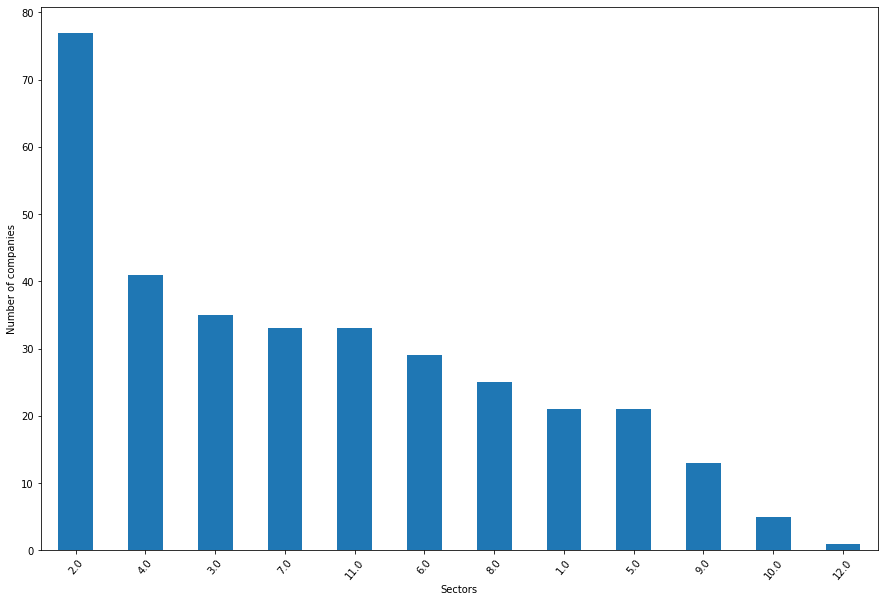

In [799]:
from matplotlib import pyplot as plt
sec_no= new_companies_data.groupby('sec_no')['tkr'].nunique()
plt.figure(figsize=(15,10))
sec_no.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Sectors")
plt.ylabel("Number of companies")
plt.show()

## **Kurtosis**

In [800]:
# new_companies_data.drop(['date', 'firm_name','tkr','sec_no' ], axis=1, inplace=True)

In [801]:
new_companies_data['px'] = new_companies_data['px'] .astype(float)
new_companies_data.dtypes

firm_name                         object
tkr                               object
sec_no                           float64
year                               int64
date                      datetime64[ns]
esg                              float64
g                                float64
s                                float64
e                                float64
es                               float64
eg                               float64
sg                               float64
esg_cubic                        float64
px                               float64
ret                              float64
historical_market_cap            float64
trail_12m_sales_per_sh           float64
is_eps                           float64
fcf                              float64
pe                               float64
return_com_eqy                   float64
roa                              float64
roa_sec_mean                     float64
roa_sec_sd                       float64
roa_z           

In [802]:
# kurtosis(new_companies_data, fisher = True)

In [803]:
kurt = pd.DataFrame(new_companies_data.kurtosis())
kurt = kurt.reset_index()
kurt = kurt.rename({0:"kurtosis", "index": "variable"}, axis=1)
kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]
kurt

C:\Users\heihe\AppData\Local\Temp/ipykernel_47044/2506432064.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = pd.DataFrame(new_companies_data.kurtosis())
C:\Users\heihe\AppData\Local\Temp/ipykernel_47044/2506432064.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt.loc[len(kurt.index)] = ['kurtosis_mean', new_companies_data.kurtosis().mean()]


,variable,kurtosis
0,sec_no,-0.843330
1,year,-1.250107
2,esg,0.498435
3,g,2.486789
4,s,1.372140
5,e,0.868594
6,es,5.831490
7,eg,1.552297
8,sg,1.806517
9,esg_cubic,4.942924


In [804]:
book = load_workbook(describe_df_path)
writer = pd.ExcelWriter(describe_df_path, engine = 'openpyxl')
writer.book = book
kurt.to_excel(writer, sheet_name='kurtosis', index=False)
writer.close()